In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
df=pd.read_csv('TaxiFare.csv')

In [3]:
df.sample(10).style.background_gradient(cmap='rainbow')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
7400,00:13.0,10.000000,2013-08-12 21:00:13 UTC,-73.984249,40.749475,-74.002094,40.726526,1
31641,37:36.0,7.000000,2013-09-10 23:37:36 UTC,-73.995787,40.716695,-73.987702,40.727010,1
38384,48:00.0,9.300000,2010-12-17 22:48:00 UTC,-73.979155,40.766935,-73.974382,40.744208,2
33437,26:00.0,13.500000,2013-11-21 02:26:00 UTC,-73.943105,40.817590,-73.946875,40.780027,1
13645,25:50.0,14.500000,2015-03-15 01:25:50 UTC,-73.990776,40.717880,-74.001739,40.685749,1
16607,51:00.0,13.000000,2014-03-11 17:51:00 UTC,-73.960810,40.781100,-73.982460,40.771820,2
14469,41:00.0,4.500000,2014-02-08 10:41:00 UTC,-73.982877,40.766430,-73.982503,40.771855,1
27527,00:44.0,10.900000,2009-02-10 10:00:44 UTC,-73.994994,40.760334,-73.963891,40.807780,1
35818,11:44.0,11.000000,2012-11-06 22:11:44 UTC,-73.979999,40.749287,-73.974242,40.783160,2
12261,49:23.0,7.300000,2009-12-19 23:49:23 UTC,-73.962992,40.769321,-73.966286,40.763152,1


In [4]:
df.describe().style.background_gradient(cmap='GnBu')

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [5]:
df.shape

(50000, 8)

In [6]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

unique_id                3597
amount                    703
date_time_of_pickup     49555
longitude_of_pickup     33716
latitude_of_pickup      36594
longitude_of_dropoff    34878
latitude_of_dropoff     37423
no_of_passenger             7
dtype: int64

In [10]:
df=df.drop(['unique_id'],axis=1)

In [11]:
df.isnull().count()

amount                  50000
date_time_of_pickup     50000
longitude_of_pickup     50000
latitude_of_pickup      50000
longitude_of_dropoff    50000
latitude_of_dropoff     50000
no_of_passenger         50000
dtype: int64

In [12]:
df.date_time_of_pickup=pd.to_datetime(df.date_time_of_pickup,errors='coerce')

In [13]:
df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [14]:
pd.DataFrame(df.date_time_of_pickup)

,date_time_of_pickup
0,2009-06-15 17:26:21+00:00
1,2010-01-05 16:52:16+00:00
2,2011-08-18 00:35:00+00:00
3,2012-04-21 04:30:42+00:00
4,2010-03-09 07:51:00+00:00
...,...
49995,2013-06-12 23:25:15+00:00
49996,2015-06-22 17:19:18+00:00
49997,2011-01-30 04:53:00+00:00
49998,2012-11-06 07:09:00+00:00


In [15]:
df = df.assign(hour = df['date_time_of_pickup'].dt.hour,
             day = df['date_time_of_pickup'].dt.day,
             dayofweek = df['date_time_of_pickup'].dt.dayofweek,
             month = df['date_time_of_pickup'].dt.month,
             year = df['date_time_of_pickup'].dt.year)

In [16]:
df.head().style.background_gradient(cmap='inferno')

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,dayofweek,month,year
0,4.500000,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,0,6,2009
1,16.900000,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,2010
2,5.700000,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,3,8,2011
3,7.700000,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,5,4,2012
4,5.300000,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,1,3,2010


In [17]:
df.drop(['date_time_of_pickup'],axis=1,inplace=True)
df.head().style.background_gradient(cmap='inferno')

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,dayofweek,month,year
0,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,17,15,0,6,2009
1,16.900000,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,2010
2,5.700000,-73.982738,40.761270,-73.991242,40.750562,2,0,18,3,8,2011
3,7.700000,-73.987130,40.733143,-73.991567,40.758092,1,4,21,5,4,2012
4,5.300000,-73.968095,40.768008,-73.956655,40.783762,1,7,9,1,3,2010


In [18]:
from math import radians, cos, sin, sqrt, asin

In [19]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_distance = []
    
    for i in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[i],latitude1[i],longitude2[i],latitude2[i]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2*asin(sqrt(a))*6371    # 6371 is the radias of earth while measuring the distance of longitude and latitude 
        travel_distance.append(c)
        
    return travel_distance

In [20]:
df['travel_distance_klm']=distance_transform(df['longitude_of_pickup'].to_numpy(),
                                             df['latitude_of_pickup'].to_numpy(),
                                             df['longitude_of_dropoff'].to_numpy(),
                                             df['latitude_of_dropoff'].to_numpy())

In [21]:
df.head().style.background_gradient(cmap='nipy_spectral')

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,dayofweek,month,year,travel_distance_klm
0,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,17,15,0,6,2009,1.030764
1,16.900000,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,2010,8.450134
2,5.700000,-73.982738,40.761270,-73.991242,40.750562,2,0,18,3,8,2011,1.389525
3,7.700000,-73.987130,40.733143,-73.991567,40.758092,1,4,21,5,4,2012,2.799270
4,5.300000,-73.968095,40.768008,-73.956655,40.783762,1,7,9,1,3,2010,1.999157


In [22]:
df.dayofweek.value_counts().sort_values()

dayofweek
6    6518
0    6639
1    6927
2    7212
3    7406
5    7630
4    7668
Name: count, dtype: int64

#### The taxi demand is at the peak on friday 

In [23]:
df.describe().style.background_gradient(cmap='tab20b')

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,dayofweek,month,year,travel_distance_klm
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,13.489080,15.672040,3.029980,6.273300,2011.739260,18.508946
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,6.506935,8.660789,1.956936,3.461157,1.862639,355.564309
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,1.000000,0.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,9.000000,8.000000,1.000000,3.000000,2010.000000,1.223146
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,14.000000,16.000000,3.000000,6.000000,2012.000000,2.120114
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,19.000000,23.000000,5.000000,9.000000,2013.000000,3.895570
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,23.000000,31.000000,6.000000,12.000000,2015.000000,8667.818812


##### here we are seeing taxi fare is minimum value of -5 which is not possible
##### using the research done on the data the minimum fare in newyork is 2.5

In [24]:
df=df.loc[(df.amount >= 2.5)]

In [25]:
df.shape

(49990, 12)

<Axes: xlabel='amount'>

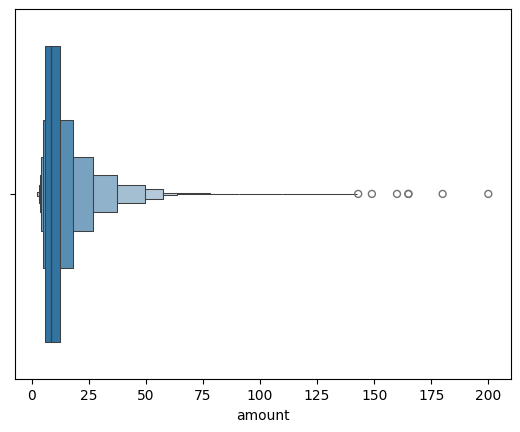

In [26]:
sns.boxenplot(x='amount',data=df)

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
lowage,uppage=remove_outlier(df['amount'])
df['amount']=np.where(df['amount']>uppage,uppage,df['amount'])
df['amount']=np.where(df['amount']<lowage,lowage,df['amount'])

<Axes: xlabel='amount'>

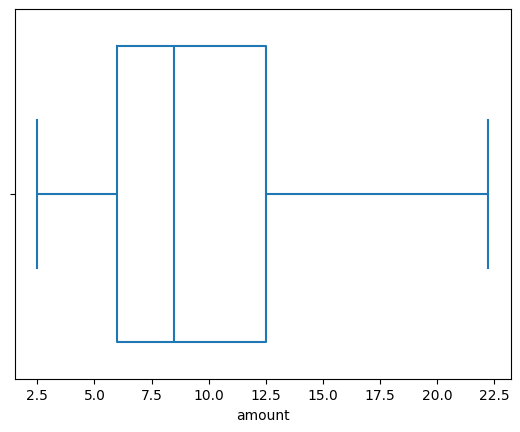

In [29]:
sns.boxplot(x='amount',data=df,fill=False)

<Axes: xlabel='travel_distance_klm'>

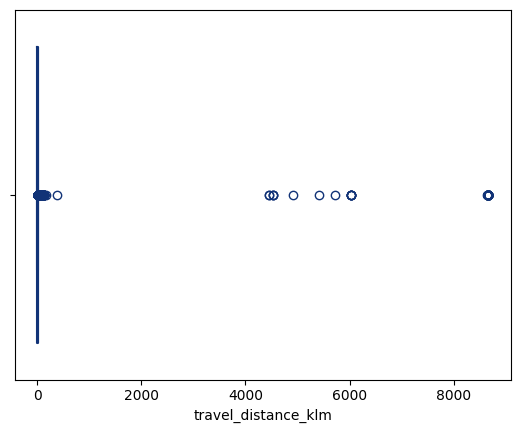

In [30]:
sns.boxplot(x='travel_distance_klm',data=df,fill=False,color="#137")

In [31]:
lowage,uppage=remove_outlier(df['travel_distance_klm'])
df['travel_distance_klm']=np.where(df['travel_distance_klm']>uppage,uppage,df['travel_distance_klm'])
df['travel_distance_klm']=np.where(df['travel_distance_klm']<lowage,lowage,df['travel_distance_klm'])

<Axes: xlabel='travel_distance_klm'>

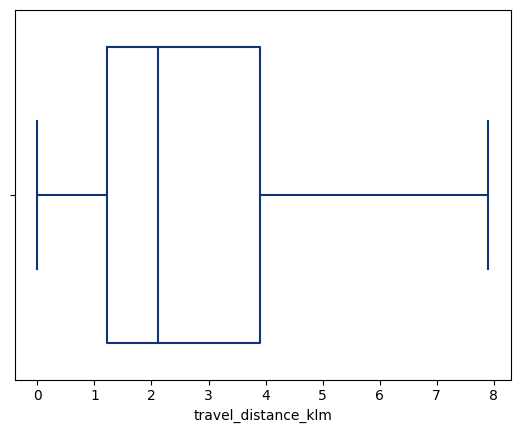

In [32]:
sns.boxplot(x='travel_distance_klm',data=df,fill=False,color="#137")

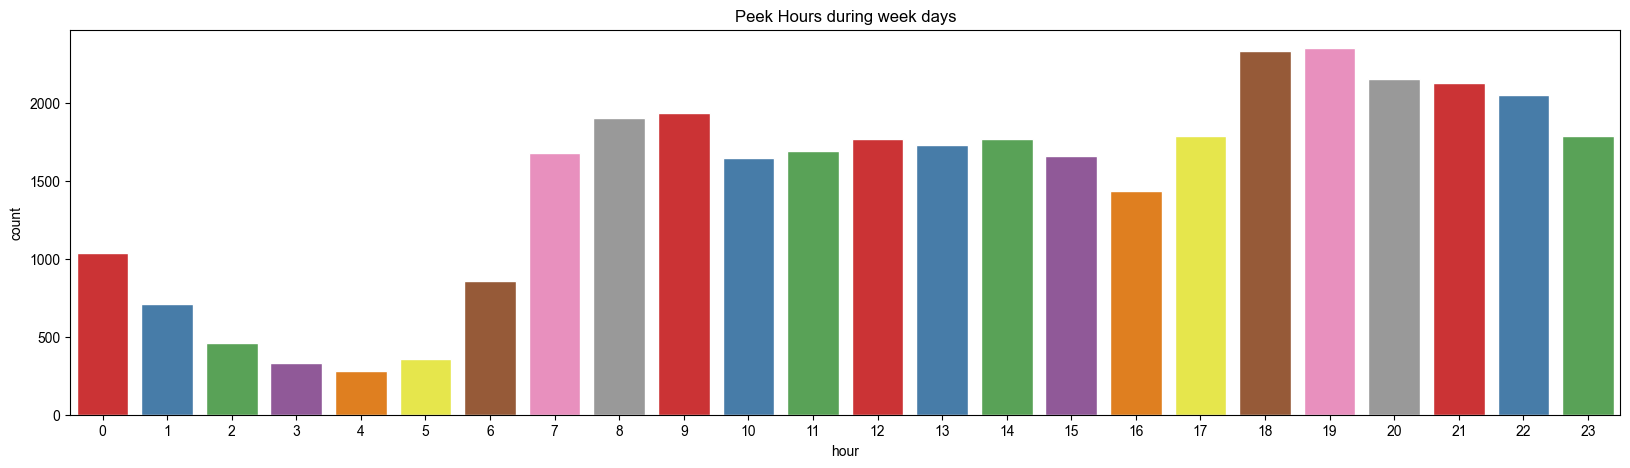

In [33]:
plt.figure(figsize=(20,5))
plt.title ('Peek Hours during week days')
sns.set(style="whitegrid")  
custom_palette = sns.color_palette("Set1", n_colors=len(set(df)))
sns.countplot(x='hour',data=df.loc[(df['dayofweek']>=0) & (df['dayofweek']<=4)],palette=custom_palette)
plt.show()

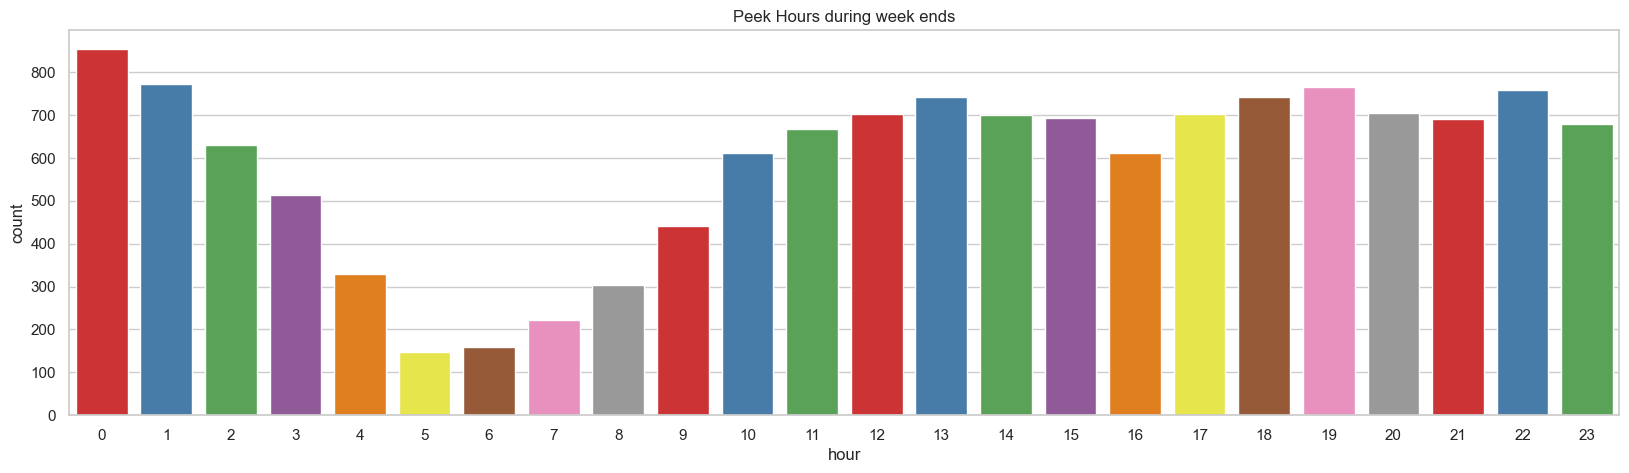

In [34]:
plt.figure(figsize=(20,5))
plt.title ('Peek Hours during week ends')
sns.countplot(x='hour',data=df.loc[(df['dayofweek']>=5) & (df['dayofweek']<=6)],palette=custom_palette)
plt.show()

In [35]:
week_days = df.loc[(df.dayofweek >= 0) & (df.dayofweek <= 4)]
week_ends = df.loc[(df.dayofweek >= 5) & (df.dayofweek <= 6)]

week_days_fare = week_days.groupby(['hour']).amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['hour']).amount.mean().to_frame().reset_index()

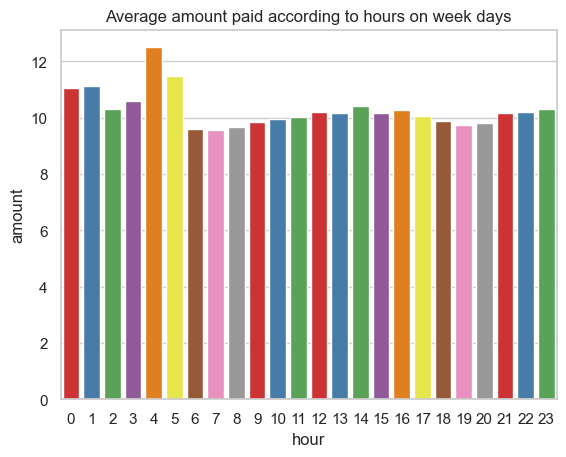

In [36]:
sns.barplot(x='hour',y='amount',palette=custom_palette,data=week_days_fare)
plt.title('Average amount paid according to hours on week days')
plt.show()

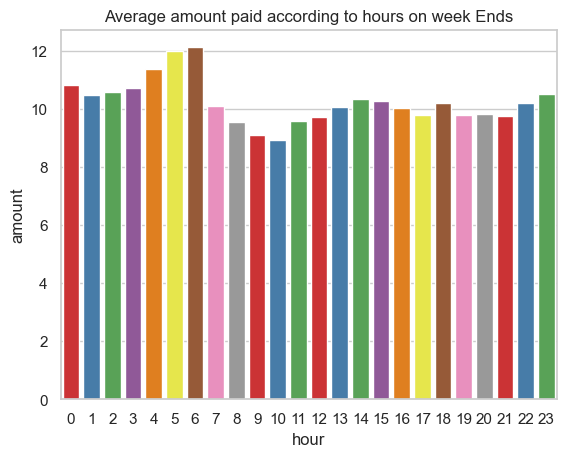

In [37]:
sns.barplot(x='hour',y='amount',palette=custom_palette,data=week_ends_fare)
plt.title('Average amount paid according to hours on week Ends')
plt.show()

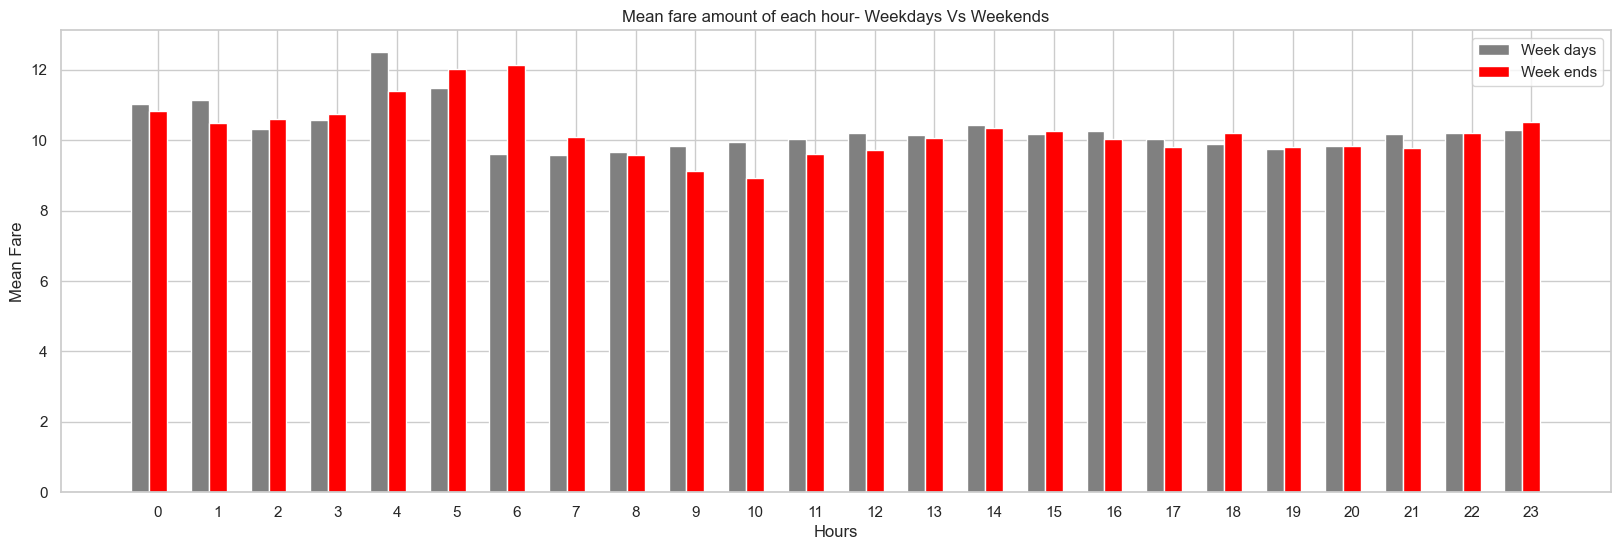

In [38]:
wwc = pd.merge(week_days_fare, week_ends_fare, on='hour',suffixes=['_Weekday','_Weekends'])
x=np.array(wwc.hour)
y=np.array(wwc.amount_Weekday)
z=np.array(wwc.amount_Weekends)

plt.figure(figsize=(20,6))
plt.title('Mean fare amount of each hour- Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')

ax=plt.subplot(1,1,1)
ax.bar(x-0.3 , y , width=0.3,color='gray', align='center', label = 'Week days')
ax.bar(x , z , width=0.3,color='red', align='center', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()
plt.show()

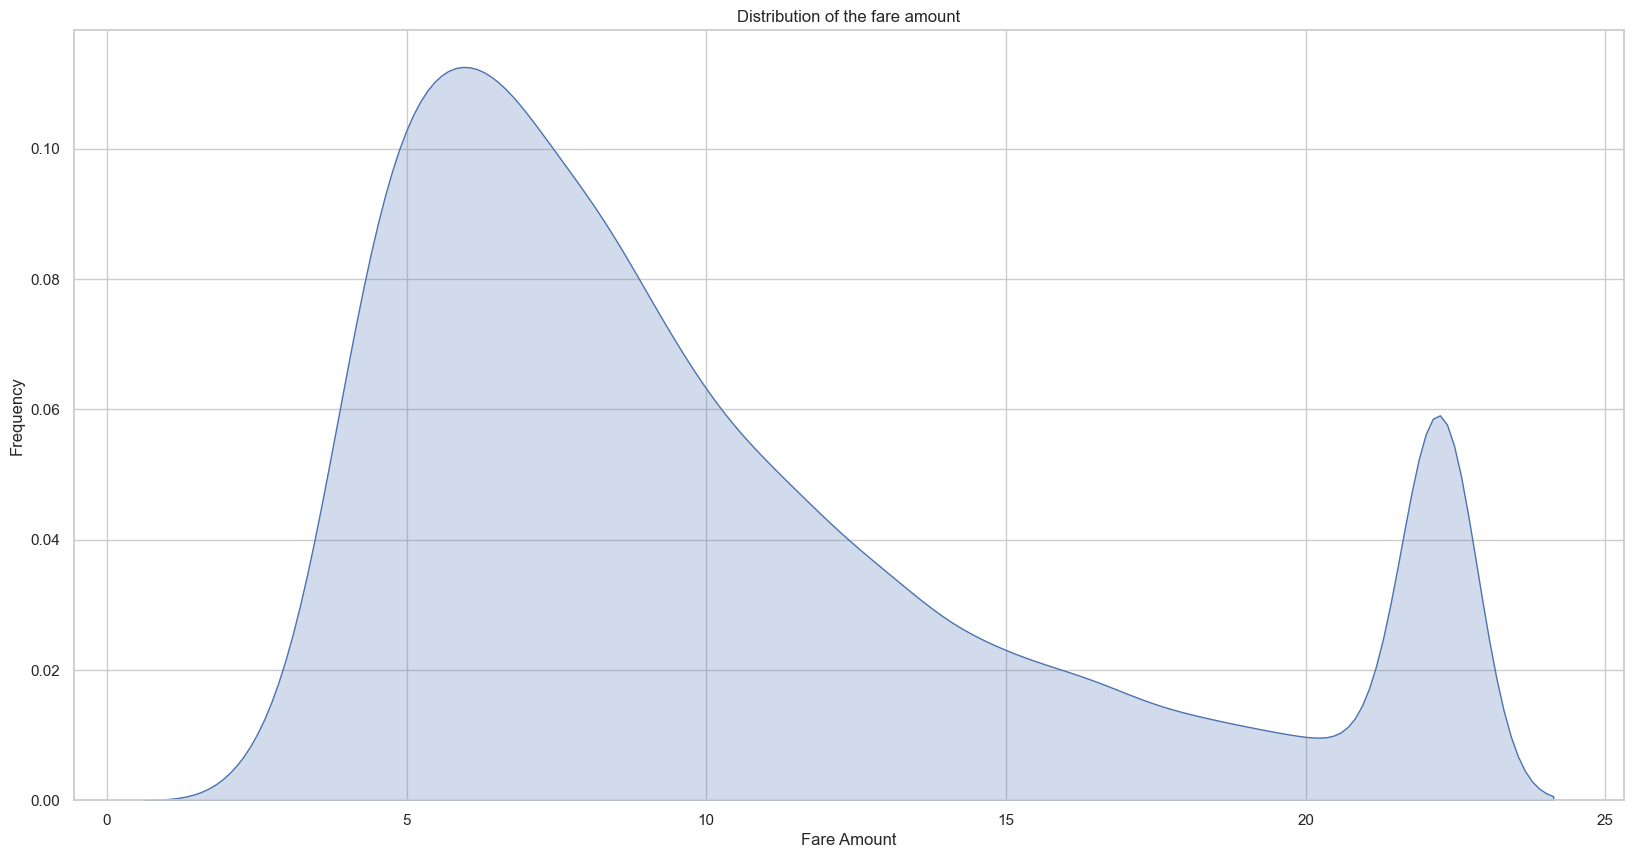

In [39]:
plt.figure(figsize=(20,10))
sns.set_style=("darkgrid")
plt.title("Distribution of the fare amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.xticks(range(0,200,5))

snsplot = sns.kdeplot(df.amount, shade=True)

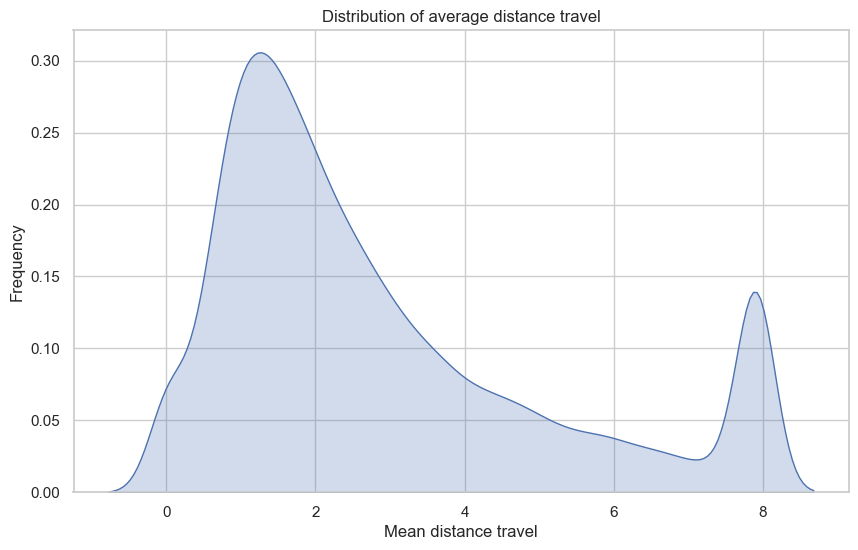

In [40]:
plt.figure(figsize=(10,6))
sns.set_style=('darkgrid')
plt.title('Distribution of average distance travel')
plt.xlabel('Mean distance travel')
plt.ylabel('Frequency')

sns.plot = sns.kdeplot(df[df.travel_distance_klm<130].travel_distance_klm, shade=True)


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [43]:
x=df.drop(['amount'],axis=1)
y=pd.DataFrame(df['amount'])

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [113]:
from sklearn.metrics import mean_squared_error

### RandomForest Regression

In [114]:
rfr=RandomForestRegressor(n_estimators=15,max_features=0.3, min_samples_split=40)

In [115]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_features=0.3, min_samples_split=40, n_estimators=15)

In [116]:
rfr.score(x_train,y_train)

0.8565258413305752

In [117]:
rfr.score(x_test,y_test)

0.8106038960477677

### Linear Regressor

In [118]:
lr=LinearRegression()

In [119]:
lr.fit(x_train,y_train)

LinearRegression()

In [120]:
lr.score(x_train,y_train)

0.7444693386358987

In [121]:
lr.score(x_test,y_test)

0.7470248350286319

### DecisionTree Regressor

In [203]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',min_samples_split=50,ccp_alpha=0.003)

In [204]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.003, criterion='friedman_mse',
                      min_samples_split=50)

In [205]:
dtr.score(x_train,y_train)

0.8120170315893656

In [206]:
dtr.score(x_test,y_test)

0.7872623630162245

### KNeighborsRegressor

In [222]:
knr=KNeighborsRegressor(n_neighbors=10)

In [223]:
knr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [224]:
knr.score(x_train,y_train)

0.7746326519799341

In [225]:
knr.score(x_test,y_test)

0.7320377954695994

### GradientBoostingRegressor

In [229]:
gbr=GradientBoostingRegressor()

In [230]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [231]:
gbr.score(x_train,y_train)

0.8082399876131476

In [232]:
gbr.score(x_test,y_test)

0.8087724461538894

### BaggingRegressor

In [276]:
br=BaggingRegressor(n_estimators=20,max_samples=0.15)

In [277]:
br.fit(x_train,y_train)

BaggingRegressor(max_samples=0.15, n_estimators=20)

In [278]:
br.score(x_train,y_train)

0.8434399827351081

In [279]:
br.score(x_test,y_test)

0.7991517898270022

### AdaBoostRegressor

In [332]:
abd=AdaBoostRegressor(n_estimators=10,loss='linear',learning_rate=0.1)

In [333]:
abd.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=10)

In [334]:
abd.score(x_train,y_train)

0.7358299082320392

In [335]:
abd.score(x_test,y_test)

0.7400905720405632

### RandomForest Regression shows the best result with score of 85%(approx)